Pre-Processing Data

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
# 1. Remove Unnecessary Features
drop_columns = ['id', 'url', 'region_url', 'image_url', 'VIN', 'description', 'county', 'posting_date']
df = df.drop(columns=drop_columns)


In [5]:
# 2. Handle Missing Data
for column in ['model', 'condition', 'cylinders', 'manufacturer', 'fuel', 'transmission']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
df['odometer'].fillna(df['odometer'].mean(), inplace=True)  
df['car_age'].fillna(df['car_age'].mean(), inplace=True) 

df['lat'].fillna(df['lat'].mean(), inplace=True)
df['long'].fillna(df['long'].mean(), inplace=True)

for column in ['size', 'drive', 'paint_color', 'type', 'title_status']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [25]:
df.to_csv('cleaned_vehicle.csv', index=False)


Modeling

In [28]:
pip install --upgrade pip

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 2.3 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.1 MB 2.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/2.1 MB 2.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 3.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 6.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.9/2.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3
    Uninstalling pip-23.3:
      Successfully uninstalled pip-23.3
Note: you may need to restart the kernel to use updated packages.


In [30]:
data = pd.read_csv('cleaned_vehicle.csv')

In [31]:
print(data.head())
print(data.isnull().sum())


                   region  price  model condition    cylinders      odometer   
0                prescott   6000  f-150      good  6 cylinders  98043.331443  \
1            fayetteville  11900  f-150      good  6 cylinders  98043.331443   
2            florida keys  21000  f-150      good  6 cylinders  98043.331443   
3  worcester / central MA   1500  f-150      good  6 cylinders  98043.331443   
4              greensboro   4900  f-150      good  6 cylinders  98043.331443   

  title_status drive       size   type  ... manufacturer_tesla   
0        clean   4wd  full-size  sedan  ...              False  \
1        clean   4wd  full-size  sedan  ...              False   
2        clean   4wd  full-size  sedan  ...              False   
3        clean   4wd  full-size  sedan  ...              False   
4        clean   4wd  full-size  sedan  ...              False   

  manufacturer_toyota  manufacturer_volkswagen  manufacturer_volvo   
0               False                    False      

In [32]:
X = data[['odometer']]
y = data['price']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 391500820907556.0


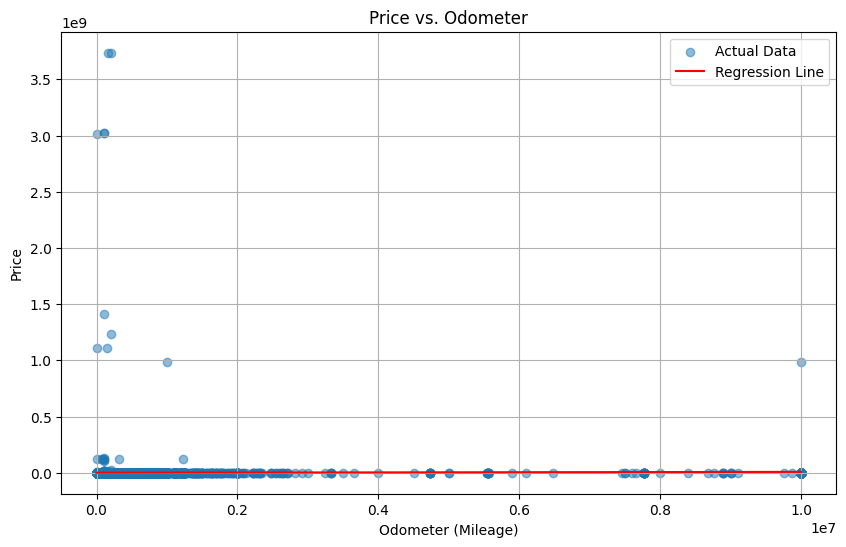

In [38]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(data['odometer'], data['price'], alpha=0.5, label='Actual Data')

# Regression line
sorted_order = data['odometer'].argsort()  
plt.plot(data['odometer'][sorted_order], model.predict(data[['odometer']])[sorted_order], color='red', label='Regression Line')

plt.title('Price vs. Odometer')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
